In [26]:
from ktc.model import *
from ktc.data_reader import *
import matplotlib.pyplot as plt

In [27]:
fileName = "data/TrainingData/data1.mat"
matdict_ref = sp.io.loadmat("data/TrainingData/ref.mat")
matdict = sp.io.loadmat(fileName)
data = DataReader(matdict)
ref = DataReader(matdict_ref)

In [28]:
background_conductivity = 0.8
electrode_count = 32
impedance = np.full(electrode_count, 1e-6)
radius = 1

mesh, subdomains = create_disk_mesh(radius, electrode_count, polygons=200, fineness=50)
forward_model = FenicsForwardModel(mesh, subdomains, electrode_count, impedance, background_conductivity)

  Calling FFC just-in-time (JIT) compiler, this may take some time.


  Calling FFC just-in-time (JIT) compiler, this may take some time.
0.14244333255287422
  Calling FFC just-in-time (JIT) compiler, this may take some time.
0.09912737633888091
  Calling FFC just-in-time (JIT) compiler, this may take some time.
0.24455250550462604
  Calling FFC just-in-time (JIT) compiler, this may take some time.
0.18110621498196444


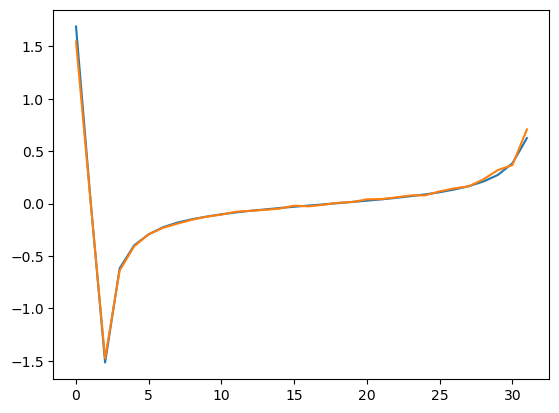

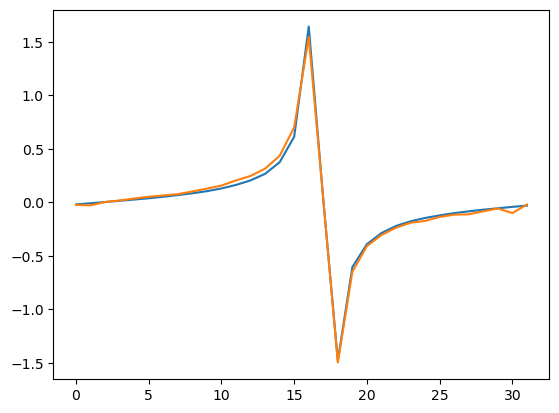

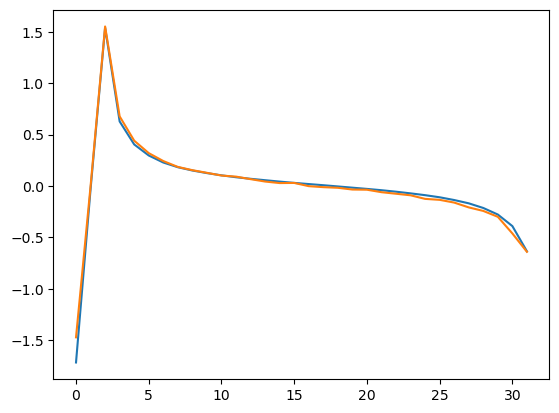

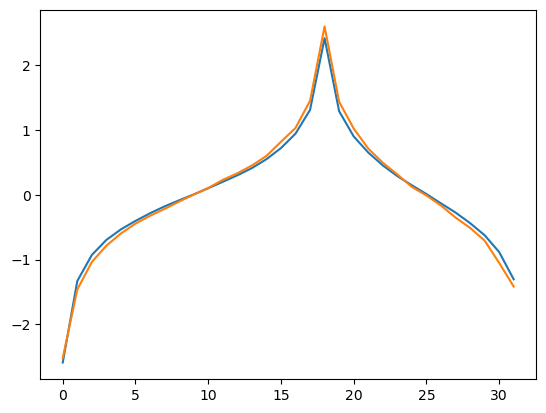

In [29]:
for inject in np.arange(0,32,8):
    u, U = forward_model.solve_forward(data.current_injections[inject])
    plt.figure()
    plt.plot(U)
    plt.plot(ref.voltages[inject])
    print(np.max(np.abs(U-ref.voltages[inject])))